In [75]:
import folium
from folium.plugins import HeatMap
import pandas as pd

In [76]:
heatmap_df = pd.read_csv("grouped_residuals_by_date_and_location.csv")
heatmap_df["latitude"]=0
heatmap_df["longitude"] =0

maplist = {"R1_M20_6468A":(51.30896,0.380471),"R1_M20_6477A":(51.30950,0.393356),"R1_M25_4094A":(51.42118,0.234001),
           "R2_A2_8362A":(51.42055,0.343562),"R2_A2_8380A":(51.41359,0.366058),"R2_M2_8431J":(51.39994,0.433861),
           "R3_5889_1":(51.11011,1.286078),"R3_M20_6576A":(51.29545,0.528170),
           "R4_M2_8545A":(51.32647,0.530954),"R4_M2_8565A":(51.32574,0.559163)}
for item in maplist.keys():
    heatmap_df.loc[heatmap_df['label']==item,"latitude"]=maplist[item][0]
    heatmap_df.loc[heatmap_df['label']==item,"longitude"]=maplist[item][1]


/var/tmp/ipykernel_4070/3042241901.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '51.30896' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  heatmap_df.loc[heatmap_df['label']==item,"latitude"]=maplist[item][0]
/var/tmp/ipykernel_4070/3042241901.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.380471' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  heatmap_df.loc[heatmap_df['label']==item,"longitude"]=maplist[item][1]


In [23]:
showdata = heatmap_df.iloc[1:11]


In [28]:
showdata.iloc[:,2:98]

,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,02:00,02:15,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
1,0.015306,0.031081,0.004674,0.020628,0.027759,0.019943,0.058721,0.021577,0.006162,0.013692,...,0.006776,0.030906,0.028806,0.033710,0.053932,0.005519,0.010987,0.041581,0.039841,0.020971
2,0.020304,0.006789,0.029111,0.001641,0.014479,0.010907,0.002723,0.014855,0.002865,0.051855,...,0.035189,0.039183,0.028296,0.024757,0.002968,0.009933,0.020577,0.019095,0.003578,0.030669
3,0.003916,0.013310,0.009253,0.027613,0.031408,0.073820,0.056242,0.058975,0.047397,0.020943,...,0.010287,0.016304,0.055631,0.027665,0.068615,0.003489,0.055300,0.036210,0.039953,0.020013
4,0.008813,0.023297,0.004016,0.008913,0.005129,0.063965,0.071996,0.065076,0.032145,0.009539,...,0.000281,0.018035,0.066278,0.048085,0.040681,0.001554,0.034582,0.041151,0.038267,0.005575
5,0.000666,0.000563,0.019813,0.000140,0.014733,0.006833,0.014457,0.001171,0.028973,0.010900,...,0.014115,0.018094,0.005207,0.014278,0.008683,0.000942,0.002472,0.019789,0.019502,0.008613
6,0.004396,0.002125,0.007230,0.007911,0.000214,0.003092,0.010254,0.004611,0.024272,0.010933,...,0.008613,0.003391,0.006575,0.012174,0.022513,0.025531,0.044549,0.014174,0.097579,0.042507
7,0.006913,0.016323,0.013530,0.002780,0.005036,0.039823,0.055651,0.051838,0.006003,0.000457,...,0.012714,0.042336,0.055859,0.010229,0.009992,0.038263,0.044016,0.014881,0.001098,0.003301
8,0.008194,0.016719,0.012997,0.007033,0.023101,0.002268,0.010154,0.035585,0.005887,0.013205,...,0.029389,0.021729,0.017337,0.026191,0.025599,0.030509,0.042587,0.060521,0.044756,0.032447
9,0.006877,0.007919,0.016760,0.001538,0.022092,0.010273,0.024489,0.017131,0.014504,0.020326,...,0.030499,0.065296,0.035134,0.033509,0.017981,0.026677,0.031979,0.052988,0.024193,0.051274
10,0.027428,0.036632,0.014557,0.034281,0.005520,0.025866,0.025057,0.009674,0.007405,0.015593,...,0.012272,0.030328,0.030990,0.017917,0.014268,0.022499,0.004541,0.047566,0.013426,0.000885


In [43]:
showdata.columns

Index(['Report Date', 'label', '00:00', '00:15', '00:30', '00:45', '01:00',
       '01:15', '01:30', '01:45',
       ...
       '21:30_normalized', '21:45_normalized', '22:00_normalized',
       '22:15_normalized', '22:30_normalized', '22:45_normalized',
       '23:00_normalized', '23:15_normalized', '23:30_normalized',
       '23:45_normalized'],
      dtype='object', length=197)

In [77]:


# 找到两个数据集的全局最小值和最大值
global_min = showdata.iloc[:,2:98].min().min()
global_max = showdata.iloc[:,2:98].max().max()

# 归一化函数
def normalize(value, min_val, max_val):
    return (value - min_val) / (max_val - min_val)

# 归一化数据
for item in showdata.columns[2:98]:
    showdata[f'{item}_normalized'] = showdata[item].apply(normalize, args=(global_min, global_max))


/var/tmp/ipykernel_4070/1416179236.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  showdata[f'{item}_normalized'] = showdata[item].apply(normalize, args=(global_min, global_max))


In [57]:
showdata.iloc[:,101:198]

,00:00_normalized,00:15_normalized,00:30_normalized,00:45_normalized,01:00_normalized,01:15_normalized,01:30_normalized,01:45_normalized,02:00_normalized,02:15_normalized,...,21:30_normalized,21:45_normalized,22:00_normalized,22:15_normalized,22:30_normalized,22:45_normalized,23:00_normalized,23:15_normalized,23:30_normalized,23:45_normalized
1,0.051196,0.104227,0.015455,0.069085,0.093058,0.066785,0.197143,0.072276,0.020455,0.045768,...,0.022520,0.103638,0.096578,0.113066,0.181046,0.018296,0.036675,0.139523,0.133674,0.070241
2,0.067998,0.022565,0.097602,0.005259,0.048415,0.036407,0.008896,0.049678,0.009373,0.174062,...,0.118037,0.131462,0.094863,0.082967,0.009719,0.033132,0.068915,0.063932,0.011771,0.102841
3,0.012905,0.044487,0.030849,0.092567,0.105325,0.247904,0.188810,0.197999,0.159078,0.070147,...,0.034325,0.054550,0.186756,0.092743,0.230405,0.011470,0.185644,0.121467,0.134052,0.067020
4,0.029368,0.078059,0.013243,0.029705,0.016983,0.214772,0.241770,0.218507,0.107804,0.031810,...,0.000684,0.060369,0.222547,0.161388,0.136497,0.004967,0.115996,0.138079,0.128385,0.018484
5,0.001979,0.001635,0.066348,0.000213,0.049269,0.022713,0.048343,0.003677,0.097139,0.036385,...,0.047192,0.060568,0.017246,0.047739,0.028929,0.002909,0.008051,0.066265,0.065302,0.028695
6,0.014519,0.006885,0.024046,0.026336,0.000460,0.010136,0.034211,0.015243,0.081338,0.036494,...,0.028695,0.011141,0.021843,0.040666,0.075424,0.085568,0.149502,0.047390,0.327772,0.142638
7,0.022981,0.054614,0.045225,0.009088,0.016672,0.133614,0.186825,0.174006,0.019923,0.001277,...,0.042481,0.142063,0.187524,0.034127,0.033330,0.128369,0.147712,0.049768,0.003433,0.010839
8,0.027288,0.055944,0.043433,0.023383,0.077401,0.007365,0.033877,0.119367,0.019532,0.044132,...,0.098539,0.072788,0.058024,0.087789,0.085799,0.102302,0.142907,0.203195,0.150199,0.108817
9,0.022860,0.026364,0.056085,0.004912,0.074007,0.034274,0.082067,0.057330,0.048499,0.068071,...,0.102271,0.219247,0.117852,0.112388,0.060189,0.089422,0.107245,0.177872,0.081070,0.172109
10,0.091947,0.122887,0.048678,0.114985,0.018299,0.086697,0.083974,0.032263,0.024634,0.052160,...,0.040996,0.101696,0.103919,0.059973,0.047706,0.075377,0.015008,0.159645,0.044876,0.002717


In [65]:
global_min1 = showdata.iloc[:,101:198].min().min()
global_max1 = showdata.iloc[:,101:198].max().max()
print(global_min1)
print(global_max1)

0.0
1.0


In [78]:



# Use your actual data
locations = showdata[['latitude', 'longitude']]
weights = showdata["Max Residual"].tolist()  # Convert to list for folium
data_1 = list(zip(locations['latitude'], locations['longitude'], weights))
print(weights)
center_lat = (locations['latitude'].max()+locations['latitude'].min())/2
center_log = (locations['longitude'].max()+locations['longitude'].min())/2

# Create the map
map_hooray1 = folium.Map(location=[center_lat, center_log], zoom_start=10)

#gradient = {0.0: 'blue', 0.015: 'cyan', 0.03: 'lime', 0.045: 'yellow', 0.06: 'red'}

#heatmap = HeatMap(data, min_opacity=0.5, radius=25, blur=10, max_zoom=1, gradient=gradient)

# Create a HeatMap
heatmap1 = HeatMap(data_1)
map_hooray1.add_child(heatmap1)

map_hooray1


[0.111255676, 0.10558754, 0.27428824, 0.29754514, 0.11580185, 0.09757865, 0.12473786, 0.12722388, 0.11516014, 0.29462433]


In [83]:
data_1

[(51.3095, 0.393356, 0.111255676),
 (51.42118, 0.234001, 0.10558754),
 (51.42055, 0.343562, 0.27428824),
 (51.41359, 0.366058, 0.29754514),
 (51.39994, 0.433861, 0.11580185),
 (51.11011, 1.286078, 0.09757865),
 (51.29545, 0.52817, 0.12473786),
 (51.32647, 0.530954, 0.12722388),
 (51.32574, 0.559163, 0.11516014),
 (51.30896, 0.380471, 0.29462433)]

In [84]:
data_2

[(51.3095, 0.393356, 1),
 (51.42118, 0.234001, 1),
 (51.42055, 0.343562, 1),
 (51.41359, 0.366058, 1),
 (51.39994, 0.433861, 1),
 (51.11011, 1.286078, 1),
 (51.29545, 0.52817, 1),
 (51.32647, 0.530954, 1),
 (51.32574, 0.559163, 1),
 (51.30896, 0.380471, 1)]

In [89]:
# Use your actual data
locations = showdata[['latitude', 'longitude']]
weights_2 = [1,1,1,1,1,1,1,1,1,1]
# weights_2 = showdata["01:00_normalized"].tolist()  # Convert to list for folium
data_2 = [(51.3095, 0.393356, 0),
 (51.42118, 0.234001, 0),
 (51.42055, 0.343562, 0),
 (51.41359, 0.366058, 0),
 (51.39994, 0.433861, 0),
 (51.11011, 1.286078, 0),
 (51.29545, 0.52817, 0),
 (51.32647, 0.530954, 0),
 (51.32574, 0.559163, 1),
 (51.30896, 0.380471, 1)]
print(weights_2)
center_lat = (locations['latitude'].max()+locations['latitude'].min())/2
center_log = (locations['longitude'].max()+locations['longitude'].min())/2

# Create the map
map_hooray8 = folium.Map(location=[center_lat, center_log], zoom_start=10)

#gradient = {0.0: 'blue', 0.015: 'cyan', 0.03: 'lime', 0.045: 'yellow', 0.06: 'red'}

#heatmap = HeatMap(data, min_opacity=0.5, radius=25, blur=10, max_zoom=1, gradient=gradient)

lat_longs = [
    [51.507351, -0.127758, 0.5], # london
    [53.480759, -2.242631,0.8], # Manchester
    [53.408371, -2.991573,1.0], # Liverpool
    [52.489471, -1.898575,0.5], # Birmingham
    [51.481583, -3.179090,0.2], #Cardif
]


updated_map = update_heatmap(new_data, new_center_location)

HeatMap(data_2).add_to(map_hooray8)

map_hooray8



[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


TypeError: update_heatmap() missing 1 required positional argument: 'center_location'

In [80]:
# Use your actual data
locations = showdata[['latitude', 'longitude']]
weights = showdata["02:00_normalized"].tolist()  # Convert to list for folium
data_3 = list(zip(locations['latitude'], locations['longitude'], weights))
print(weights)
center_lat = (locations['latitude'].max()+locations['latitude'].min())/2
center_log = (locations['longitude'].max()+locations['longitude'].min())/2

# Create the map
map_hooray3 = folium.Map(location=[center_lat, center_log], zoom_start=10)

#gradient = {0.0: 'blue', 0.015: 'cyan', 0.03: 'lime', 0.045: 'yellow', 0.06: 'red'}

#heatmap = HeatMap(data, min_opacity=0.5, radius=25, blur=10, max_zoom=1, gradient=gradient)


gradient = {
    0.1: 'blue', 
    0.4: 'cyan', 
    0.5: 'lime', 
    0.6: 'yellow', 
    0.7: 'orange',
    0.90: 'red'
}

# Create a HeatMap
heatmap3 = HeatMap(data_3)
map_hooray3.add_child(heatmap3)

map_hooray3


[0.020455447006296645, 0.009373054429481316, 0.15907762038900863, 0.10780352703645772, 0.0971388635151662, 0.08133821192579978, 0.019923055264780755, 0.01953227766376642, 0.048499475534652614, 0.024634028455928055]


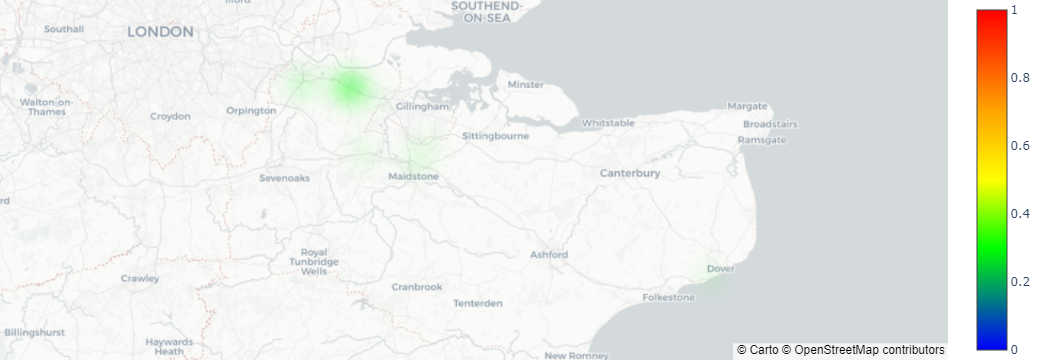

In [107]:
import pandas as pd
import numpy as np
import random
import plotly.graph_objects as go

#lat = [random.uniform(33.5, 34.5) for x in range(100)]
#lon = [random.uniform(-118.5,-117.5) for x in range(100)]
#geo_stat_list_final = pd.DataFrame({'Lat':lat,'Long':lon,'MoneyTotal': np.random.randint(1000,5000,100)})
#geo_stat_list_final['weight'] = geo_stat_list_final['MoneyTotal'] / 5000

fig = go.Figure(go.Densitymapbox(lat=showdata['latitude'], 
                                 lon=showdata['longitude'],
                                 z=showdata['08:00_normalized'],
                                 radius=40,
                                 colorscale=[[0.0, 'blue',],[0.3,'lime'],[0.5,'yellow'],[0.7,'orange'],[1.0, 'red']],# custome colorscale
                                 zmin=0.0,
                                 zmax=1.0
                                ))

fig.update_layout(mapbox_style="carto-positron",
                  mapbox_center_lon=center_log,
                  mapbox_center_lat=center_lat,
                  mapbox_zoom=8)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [90]:

# Use your actual data
locations = showdata[['latitude', 'longitude']]
weights = showdata["18:00_normalized"].tolist()  # Convert to list for folium
data = list(zip(locations['latitude'], locations['longitude'], weights))
print(weights)
center_lat = (locations['latitude'].max()+locations['latitude'].min())/2
center_log = (locations['longitude'].max()+locations['longitude'].min())/2

# Create the map
map_hooray4 = folium.Map(location=[center_lat, center_log], zoom_start=10)

#gradient = {0.0: 'blue', 0.015: 'cyan', 0.03: 'lime', 0.045: 'yellow', 0.06: 'red'}

#heatmap = HeatMap(data, min_opacity=0.5, radius=25, blur=10, max_zoom=1, gradient=gradient)

# Create a HeatMap
heatmap4 = HeatMap(data,gradient=gradient)
map_hooray4.add_child(heatmap4)

map_hooray4


[0.1623428974169373, 0.022194085094659144, 0.09278415566172053, 0.09506239601082975, 0.016899523760988005, 0.04581781051734726, 0.11299840207612394, 0.23389004683628753, 0.3868755886459525, 0.137233139079108]
